In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "ctgan"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.009869,-0.044642,-0.056211,-0.047748,-0.004433,-0.024265,-0.067064,-0.031716,-0.076616,0.006957,105.0
1,0.076509,-0.044642,0.038656,-0.010570,-0.120824,0.030653,-0.102307,0.134751,-0.014906,0.107991,346.0
2,0.060777,0.050680,0.027023,0.132044,0.060495,-0.106844,-0.102307,-0.056106,0.105271,-0.014954,158.0
3,-0.021659,-0.044642,0.134391,-0.051967,-0.015696,-0.057484,-0.030182,0.054161,-0.072691,0.050221,44.0
4,0.075652,0.050680,0.009478,0.109842,-0.058574,-0.070342,-0.077435,0.127431,0.054221,0.122863,50.0
5,0.110727,-0.044642,0.027052,0.042560,0.094021,-0.057787,-0.039982,0.053085,-0.029054,0.126893,138.0
6,0.103272,0.050680,-0.003263,0.043161,-0.036392,-0.115613,-0.092366,0.048743,0.101589,0.127191,346.0
7,0.065894,0.050680,-0.009369,-0.023307,-0.059489,-0.062862,-0.016823,-0.067492,0.047197,0.135612,298.0
8,0.100850,0.050680,0.161353,0.081581,0.028246,-0.030350,-0.064527,0.052632,-0.126097,0.061075,62.0
9,0.110727,0.050680,0.154753,-0.049556,-0.085869,-0.108690,-0.048558,-0.036169,-0.110834,0.027886,129.0


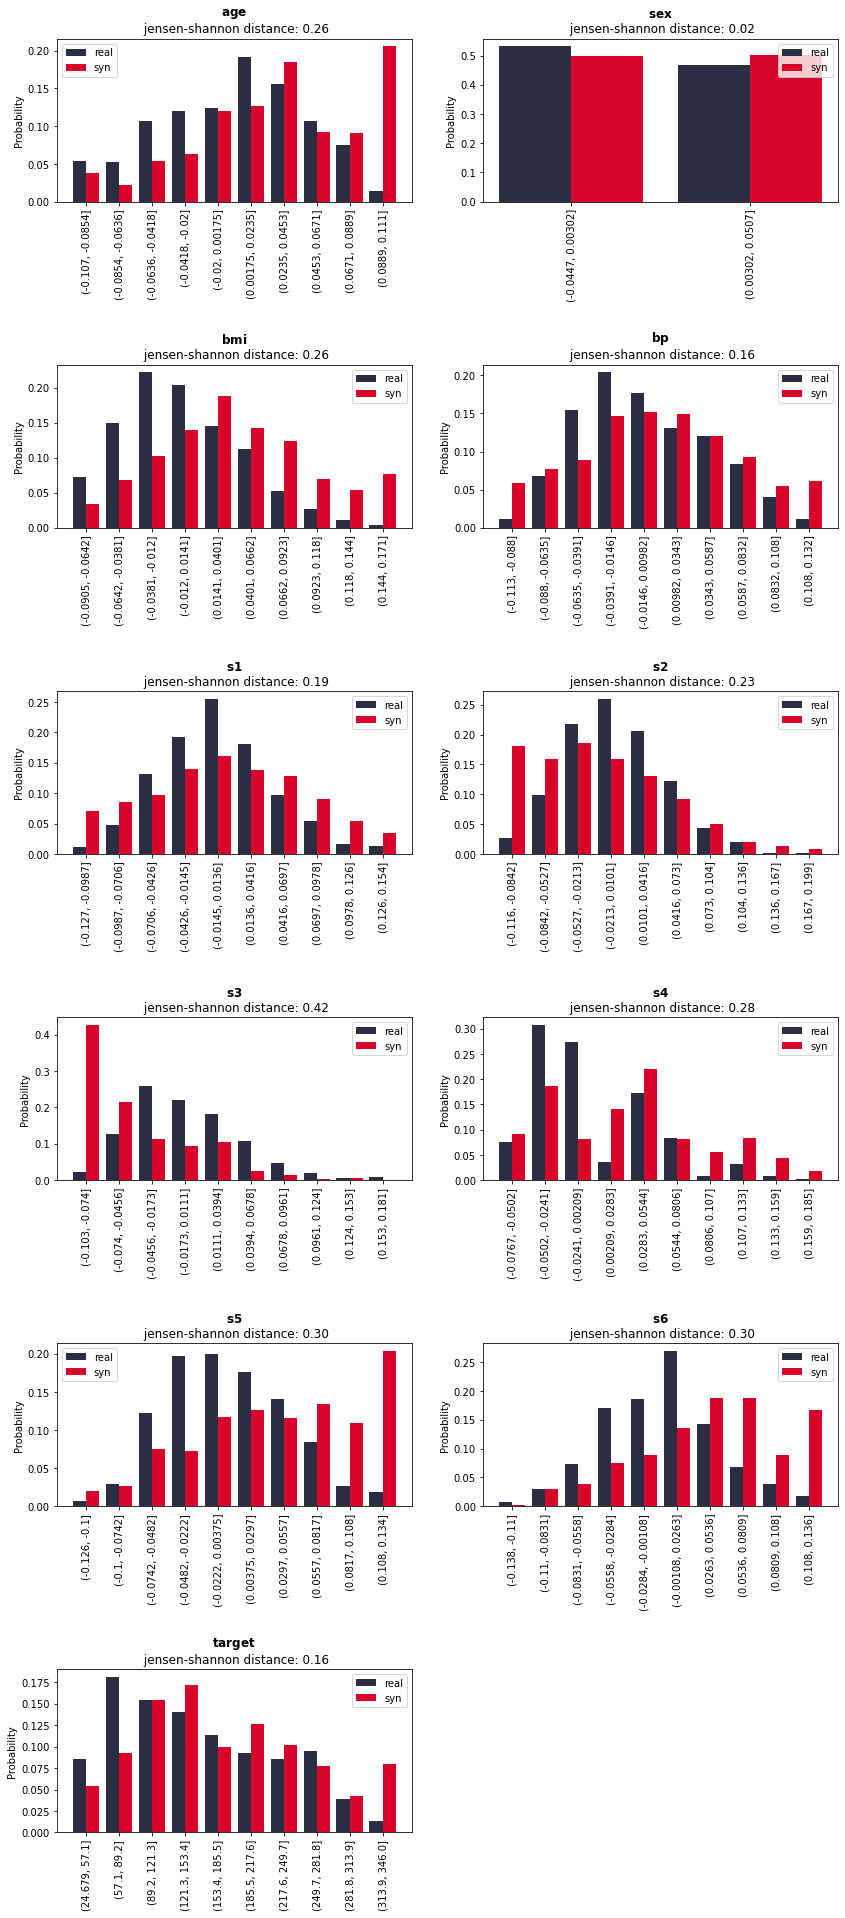

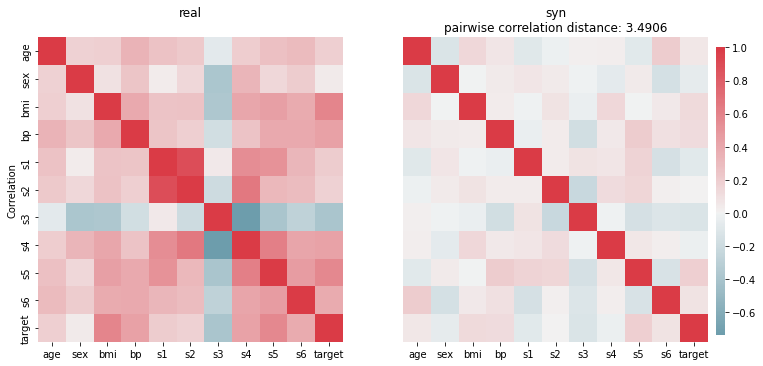

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : ctgan


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.02
sanity.avg_distance_nearest_neighbor,0.087193,0.207229,0.141169,0.049744,0.129086,0.060018,3,0,0.01
sanity.inlier_probability,0.710407,0.941176,0.793363,0.10478,0.728507,0.115385,3,0,0.01
sanity.outlier_probability,0.002262,0.024887,0.009804,0.010665,0.002262,0.011312,3,0,0.01
statistical.inverse_kl_divergence,0.806726,0.845588,0.830137,0.016834,0.838099,0.019431,3,0,0.02
statistical.kolmogorov_smirnov_test,0.733649,0.763472,0.751131,0.012707,0.756273,0.014912,3,0,0.02
statistical.chi_squared_test,0.864093,0.964917,0.905432,0.043115,0.887287,0.050412,3,0,0.02
statistical.maximum_mean_discrepancy,0.007686,0.011695,0.009465,0.001667,0.009014,0.002004,3,0,0.05
statistical.inverse_cdf_distance,1.37255,1.752732,1.584955,0.158384,1.629582,0.190091,3,0,6.45
